Introduction & purpose

This project focuses on analysing patterns in fraudulent vs. legitimate transactions using statistical analysis.

Why it matters?
financial impact

Goal
My goal doing this projects is to evaluate the existings fraud detection rules; and find patterns of the fraudulent transactions.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


Data overview
I downloaded this data from Kaggle (link at the bottom) called PaySim which is a simulation of mobile money transactions based on a sample of real transactions. 


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking if the data has any null values (NaN or null)

The second gives the total number of missin values.

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

"NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used."

based on the note above I will not be using the mentioned columns in my analysis. 

In [8]:
df_my_work = df.drop(columns=[
    'oldbalanceOrg',
    'newbalanceOrig', 
    'oldbalanceDest', 
    'newbalanceDest', 
])

df_my_work.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0


Transaction Amount distribution



In [9]:
# nmuber of transactions by type
df_my_work.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [10]:
#total number of transactions
total_transactions = df_my_work.shape[0]

In [11]:
#percantage of frauds to the total number of transactions
fraud_count = df_my_work[df_my_work['isFraud'] == 1]['isFraud'].count()
print(fraud_count)

8213


In [12]:
#percentage of the fraud to all transactions

round(fraud_count / total_transactions * 100, 2)

np.float64(0.13)

visulising the number of each transaction type

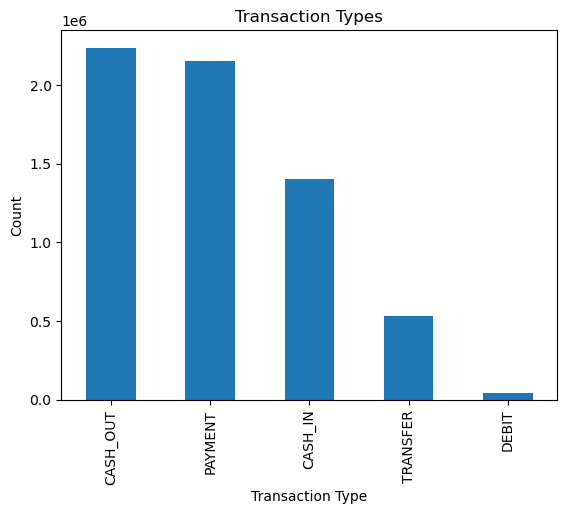

In [13]:
transaction_type_counts = df_my_work['type'].value_counts()
transaction_type_counts.plot(kind='bar', title="Transaction Types")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In the graph below we can see Fraud rate by all of the transactions

As the data says

There are no fraudulent transactions in CASH_IN DEBIT & PAYMENT type.

Fraudulent transactions only appear in Transfers and CASH_OUT transaction type. 


In Transfer types only %0.77 of the transactions appear to be fraud
and in CASH_OUT type only %0.18 are fraud

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


Text(0, 0.5, 'Rate')

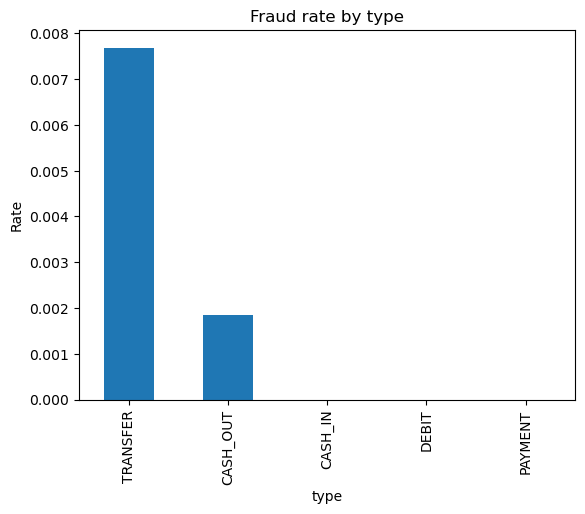

In [14]:
fraud_by_type = df_my_work.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)
fraud_by_type.plot(kind="bar", title="Fraud rate by type")
plt.ylabel("Rate")

KDE density plot to see the distribution of the 

In [15]:
df_my_work["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

The graph below suggest that the transaction amount distribution is bimodal. The tansaction amounts in this dataset have two peaks one around e^12.5 - 1 and one around e^8.5 - 1


however there is another small cluster around e^16 - 1 which can reflect an unusual pattern in this data 

Text(0.5, 0, 'Log(Amount + 1)')

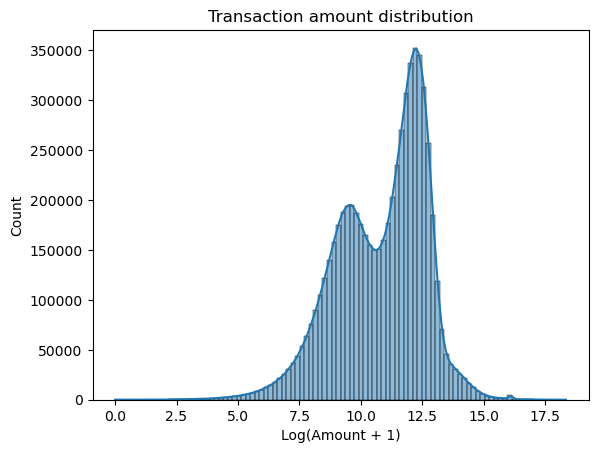

In [16]:
sb.histplot(np.log1p(df_my_work["amount"]), bins=100, kde = True)
plt.title("Transaction amount distribution")
plt.xlabel("Log(Amount + 1)")

As the boxplot below suggest

on the left the non fraudulent transactions are generally lower than the fraudulent transactions on the right.


The median of the fraudulent transactions are around 40000 and the non fraudulent ones are around 15000

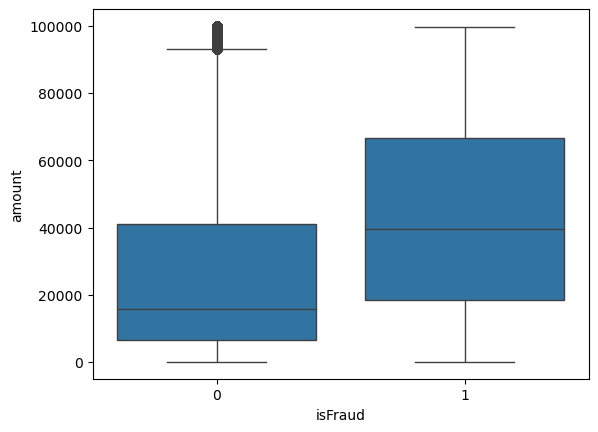

In [17]:
sb.boxplot(data=df_my_work[df_my_work["amount"] < 100000], x="isFraud", y="amount")
plt.show()

In [51]:
df_my_work[(df_my_work["isFraud"] == 1) & (df_my_work["amount"] > 3000000)].count() / df_my_work[df_my_work["amount"] > 3000000].count()

step              0.051726
type              0.051726
amount            0.051726
nameOrig          0.051726
nameDest          0.051726
isFraud           0.051726
isFlaggedFraud    0.051726
dtype: float64

In [52]:
df_my_work[(df_my_work["isFraud"] == 1) & (df_my_work["amount"] > 3000000)].count() / df_my_work[df_my_work["isFraud"] == 1].count()

step              0.142822
type              0.142822
amount            0.142822
nameOrig          0.142822
nameDest          0.142822
isFraud           0.142822
isFlaggedFraud    0.142822
dtype: float64

In [53]:
df_my_work[df_my_work["isFraud"] == 1].count()

step              8213
type              8213
amount            8213
nameOrig          8213
nameDest          8213
isFraud           8213
isFlaggedFraud    8213
dtype: int64

In [54]:
df_my_work.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
nameDest          6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

Create a Strip plot to show how scattered the genuine and fraudulent transactions are to see if there are any patters


maybe start using oldbalance and new balance columns to see if any isFlaggedFraud is flagged because of previous frauds detected in the transaction

